In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd

import constants as cnst
from classes import SuperCycle, SuperCycleScheduler
from helpers import cycles_to_dataframe, supercycles_scenario_to_dataframe

In [2]:
SPS_typical_supercycles_scenario = {
    'AWAKE': SuperCycle('SPS', 'AWAKE', 
                        [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'AWAKE with parallel MD': SuperCycle('SPS', 'AWAKE with parallel MD', 
                                         [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Dedicated MD': SuperCycle('SPS', 'Dedicated MD', 
                               [cnst.SPS_CYCLES['MD dedicated']]),
    'HiRadMat': SuperCycle('SPS', 'HiRadMat', 
                           [cnst.SPS_CYCLES['HiRadMat'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC filling': SuperCycle('SPS', 'LHC filling', 
                              [cnst.SPS_CYCLES['LHC filling'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC setup': SuperCycle('SPS', 'LHC setup', 
                            [cnst.SPS_CYCLES['LHC pilot'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics': SuperCycle('SPS', 'Physics', 
                          [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics with parallel MD': SuperCycle('SPS', 'Physics with parallel MD', 
                                           [cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Scrubbing': SuperCycle('SPS', 'Scrubbing', 
                            [cnst.SPS_CYCLES['Scrubbing'], cnst.SPS_CYCLES['SFTPRO']]),#, cnst.SPS_CYCLES['deGauss']]),
    'Thursday MD': SuperCycle('SPS', 'Thursday MD', 
                              [cnst.SPS_CYCLES['MD dedicated'], cnst.SPS_CYCLES['SFTPRO']]),#, cnst.SPS_CYCLES['deGauss']]),
}

In [3]:
SPS_future_supercycles_scenario = {
    'AWAKE': SuperCycle('SPS', 'AWAKE', 
                        [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'AWAKE with parallel MD': SuperCycle('SPS', 'AWAKE with parallel MD', 
                                         [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Dedicated MD': SuperCycle('SPS', 'Dedicated MD', 
                               [cnst.SPS_CYCLES['MD dedicated']]),
    'HiRadMat': SuperCycle('SPS', 'HiRadMat', 
                           [cnst.SPS_CYCLES['HiRadMat'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'LHC filling': SuperCycle('SPS', 'LHC filling', 
                              [cnst.SPS_CYCLES['LHC filling'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'LHC setup': SuperCycle('SPS', 'LHC setup', 
                            [cnst.SPS_CYCLES['LHC pilot'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Physics': SuperCycle('SPS', 'Physics', 
                          [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Physics with parallel MD': SuperCycle('SPS', 'Physics with parallel MD', 
                                           [cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Scrubbing': SuperCycle('SPS', 'Scrubbing', 
                            [cnst.SPS_CYCLES['Scrubbing'], cnst.SPS_CYCLES['SFTPRO']]),
    'Thursday MD': SuperCycle('SPS', 'Thursday MD', 
                              [cnst.SPS_CYCLES['MD dedicated'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
}

# Assuming only proton operation and 80% machine availability

In [4]:
time_sharing = cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only']
machine_availability = 0.8

In [5]:
supercyclescheduler1 = SuperCycleScheduler(SPS_typical_supercycles_scenario, time_sharing, machine_availability)
supercyclescheduler1.calculate_number_of_cycles()
print('Maximum BPs in the PS (availability of 100%%): %i'%(supercyclescheduler1.injector_total_bps/machine_availability))
print('Total BPs in the PS: %i'%supercyclescheduler1.injector_total_bps)
print('Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): %i'%supercyclescheduler1.injector_total_free_bps)
print('Percentage of free BPs of PS: %1.1f%%'%supercyclescheduler1.free_bps_percentage)
print('Number of times the cycles were played in the allocated time:')
print(supercyclescheduler1.number_of_cycles_played_total)

Maximum BPs in the PS (availability of 100%): 17460000
Total BPs in the PS: 13968000
Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): 9942080
Percentage of free BPs of PS: 71.2%
Number of times the cycles were played in the allocated time:
{'AWAKE': 96970.0, 'HiRadMat': 13500.0, 'LHC filling': 65475.000000000015, 'LHC pilot': 60730.434782608696, 'MD dedicated': 48817.24137931035, 'MD parallel': 208740.00000000003, 'SFTPRO': 792221.6416791605, 'Scrubbing': 4468.9655172413795, 'deGauss': 563495.4347826088}


In [6]:
supercyclescheduler2 = SuperCycleScheduler(SPS_future_supercycles_scenario, time_sharing, machine_availability)
supercyclescheduler2.calculate_number_of_cycles()
print('Maximum BPs in the PS (availability of 100%%): %i'%(supercyclescheduler2.injector_total_bps/machine_availability))
print('Total BPs in the PS: %i'%supercyclescheduler2.injector_total_bps)
print('Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): %i'%supercyclescheduler2.injector_total_free_bps)
print('Percentage of free BPs in the PS: %1.1f%%'%supercyclescheduler2.free_bps_percentage)
print('Number of times the cycles were played in the allocated time:')
print(supercyclescheduler2.number_of_cycles_played_total)

Maximum BPs in the PS (availability of 100%): 17460000
Total BPs in the PS: 13968000
Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): 8973666
Percentage of free BPs in the PS: 64.2%
Number of times the cycles were played in the allocated time:
{'AWAKE': 83527.5, 'ECN3_D (1.2s)': 1177422.0392107891, 'HiRadMat': 9818.181818181818, 'LHC filling': 80584.6153846154, 'LHC pilot': 39908.57142857143, 'MD dedicated': 43527.27272727273, 'MD parallel': 81499.90384615386, 'SFTPRO': 244506.142090668, 'Scrubbing': 4468.9655172413795, 'deGauss': 168591.02272727274}


In [7]:
print('A supercycle scenario of many dedicated ECN3 cycles would reduce the available BPs in the PS/PSB by %1.1f%%'%(supercyclescheduler1.free_bps_percentage-supercyclescheduler2.free_bps_percentage))

A supercycle scenario of many dedicated ECN3 cycles would reduce the available BPs in the PS/PSB by 6.9%


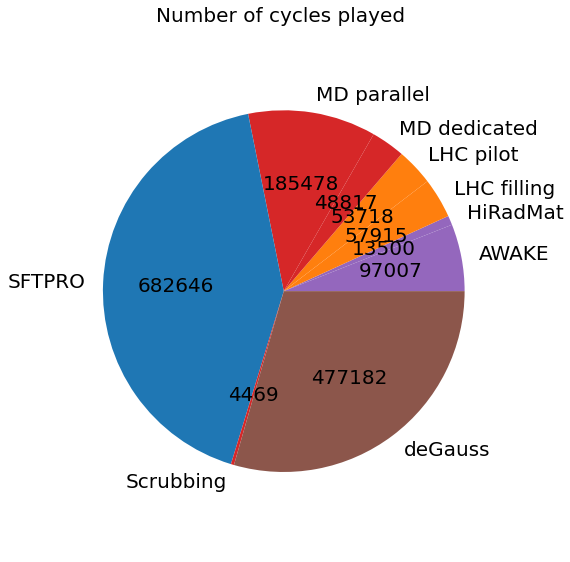

In [17]:
supercyclescheduler1.plot_cycles_time_sharing(toPlot='nr_of_cycles', percentage=False)

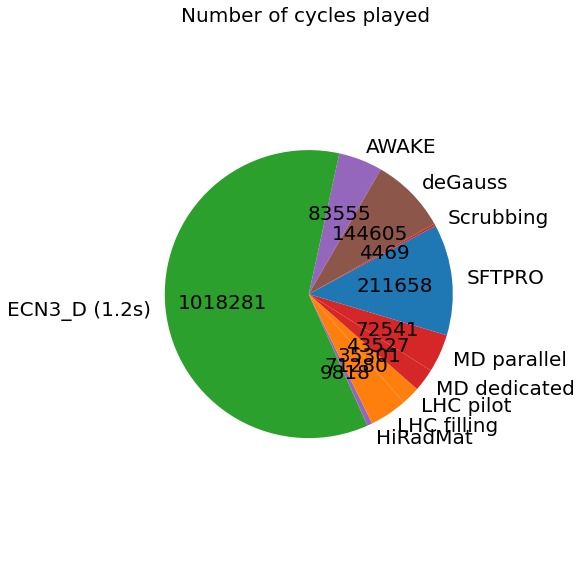

In [20]:
supercyclescheduler2.plot_cycles_time_sharing(toPlot='nr_of_cycles', percentage=False, startangle=60)

# Assuming proton and ion operation and 80% machine availability

In [10]:
time_sharing = cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['With ion run']
machine_availability = 0.8

In [11]:
supercyclescheduler1 = SuperCycleScheduler(SPS_typical_supercycles_scenario, time_sharing, machine_availability)
supercyclescheduler1.calculate_number_of_cycles()
print('Maximum BPs in the PS (availability of 100%%): %i'%(supercyclescheduler1.injector_total_bps/machine_availability))
print('Total BPs in the PS: %i'%supercyclescheduler1.injector_total_bps)
print('Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): %i'%supercyclescheduler1.injector_total_free_bps)
print('Percentage of free BPs of PS: %1.1f%%'%supercyclescheduler1.free_bps_percentage)
print('Number of times the cycles were played in the allocated time:')
print(supercyclescheduler1.number_of_cycles_played_total)

Maximum BPs in the PS (availability of 100%): 15444000
Total BPs in the PS: 12355200
Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): 8713649
Percentage of free BPs of PS: 70.5%
Number of times the cycles were played in the allocated time:
{'AWAKE': 97007.00000000003, 'HiRadMat': 13500.0, 'LHC filling': 57915.0, 'LHC pilot': 53718.26086956522, 'MD dedicated': 48817.24137931035, 'MD parallel': 185478.0, 'SFTPRO': 682646.467766117, 'Scrubbing': 4468.9655172413795, 'deGauss': 477182.2608695652}


In [12]:
supercyclescheduler2 = SuperCycleScheduler(SPS_future_supercycles_scenario, time_sharing, machine_availability)
supercyclescheduler2.calculate_number_of_cycles()
print('Maximum BPs in the PS (availability of 100%%): %i'%(supercyclescheduler2.injector_total_bps/machine_availability))
print('Total BPs in the PS: %i'%supercyclescheduler2.injector_total_bps)
print('Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): %i'%supercyclescheduler2.injector_total_free_bps)
print('Percentage of free BPs in the PS: %1.1f%%'%supercyclescheduler2.free_bps_percentage)
print('Number of times the cycles were played in the allocated time:')
print(supercyclescheduler2.number_of_cycles_played_total)

Maximum BPs in the PS (availability of 100%): 15444000
Total BPs in the PS: 12355200
Total free BPs in the PS (for AD, EAST, TOF, Zeros, MDs, setup): 7892792
Percentage of free BPs in the PS: 63.9%
Number of times the cycles were played in the allocated time:
{'AWAKE': 83555.25000000001, 'ECN3_D (1.2s)': 1018280.8949800199, 'HiRadMat': 9818.181818181818, 'LHC filling': 71280.0, 'LHC pilot': 35300.571428571435, 'MD dedicated': 43527.27272727273, 'MD parallel': 72541.24038461539, 'SFTPRO': 211658.4786291295, 'Scrubbing': 4468.9655172413795, 'deGauss': 144604.89772727274}


In [13]:
print('A supercycle scenario of many dedicated ECN3 cycles would reduce the available BPs in the PS/PSB by %1.1f%%'%(supercyclescheduler1.free_bps_percentage-supercyclescheduler2.free_bps_percentage))

A supercycle scenario of many dedicated ECN3 cycles would reduce the available BPs in the PS/PSB by 6.6%


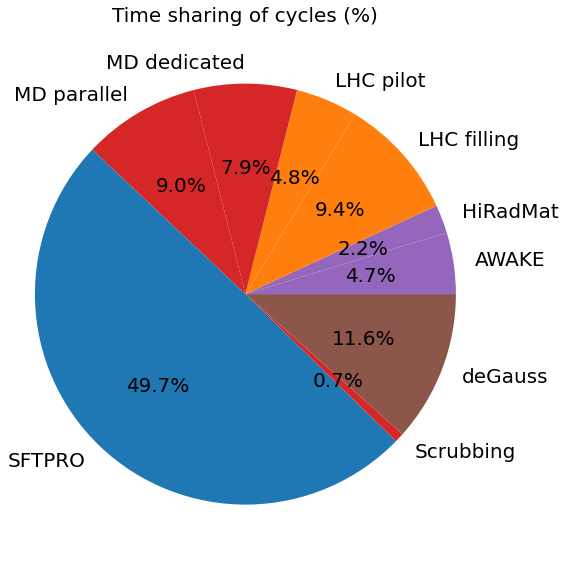

In [14]:
supercyclescheduler1.plot_cycles_time_sharing()

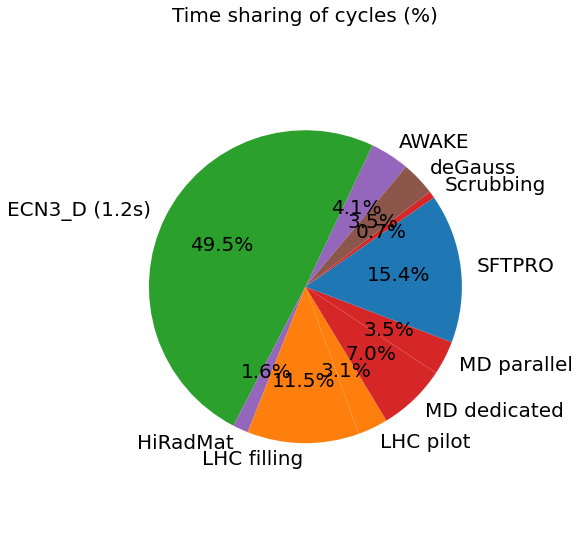

In [15]:
supercyclescheduler2.plot_cycles_time_sharing(startangle=50)